## 딥러닝2_사전과제_안가은

### 1. RNN (Recurrent Neural Network)
#### 1-1) 순차 데이터 (Sequence Data): 순서에 의미가 있는 데이터
* 특징
  1. 요소의 순서 의존성: 데이터를 구성하는 요소들의 순서 자체가 핵심 정보.
  2. 자기상관성: 이전 시점의 데이터가 다음 시점의 데이터에 영향을 미침.
* 예시
  + 음성 및 오디오 데이터: 소리의 파형이 시간에 따라 연속적으로 변화
  + 자연어: 문장, 단락, 문서 등 단어으 순서가 중요
  + 생물학적 서열 데이터: DNA, 단백질 서열
  + 비디오 데이터: 이미지 프레임이 순서대로 나열된 형태      
* -> 따라서 순서의 의미 학습할 수 있는 신경망 RNN이 필요

#### 1-2) RNN의 구조와 원리
* RNN 정의: 순환하는 구조를 가진, 순차 데이터 처리에 특화된 인공 신경망
* RNN 구조

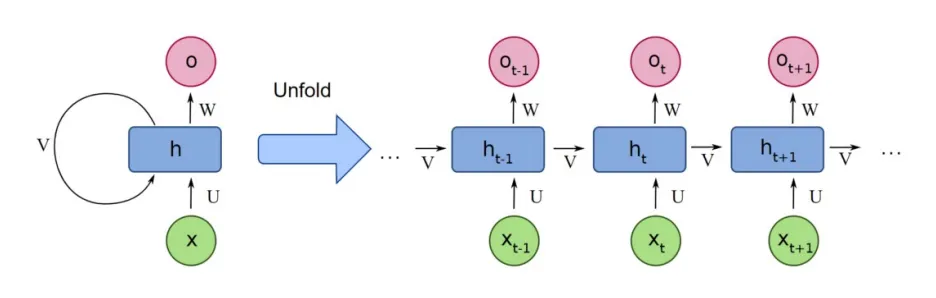

> * 초록색: 입력층 / 파란색: 은닉층 / 분홍색: 출력층
> * x_t: 시간 스텝 t에서의 입력(input)
> * h_t: 시간 스텝 t에서의 은닉 상태(hidden state). 해당 시점의 메모리
> * o_t: 시간 스텝 t에서의 출력(output)
> * U(입력 가중치): x_t가 h_t에 영향을 주는 가중치, 현재 정보를 처리.
> * **V(순환 가중치)**: 이전 시점 t-1의 은닉상태 h_(t-1)가 h_t에 영향을 주는 가중치.
> * W(출력 가중치): 현재 시점 t 의 은닉상태 h_t가 최종 출력 o_t에 영향 미치는 가중치, 계산된 메모리 바탕으로 결과 만듦.

* 은닉층(hidden layer): 신경망을 구성하는 물리적 요소로, 가중치와 활성화 함수를 포함하는 그 자체.
* 은닉 상태(hidden state): 특정 시점(t)에 은닉층을 통과한 결과값(메모리). 벡터이다.

>  정보의 흐름
> + t-1 시점: 입력 x_(t-1) 들어가 h_(t-1) 업데이트하고 출력 o_(t-1) 내보냄
> + t 시점: (t-1)시점에서 계산된 h_(t-1)이 넘어와 새로운 입력 x_t와 함께 현재 사용하여 h_t 업데이트 하고 o_t 계산, 내보냄.
> * 즉, 은닉 상태의 순환을 통해 과거의 정보를 다음 시점으로 계속 전달한다.

* RNN의 핵심 원리; 가중치 공유

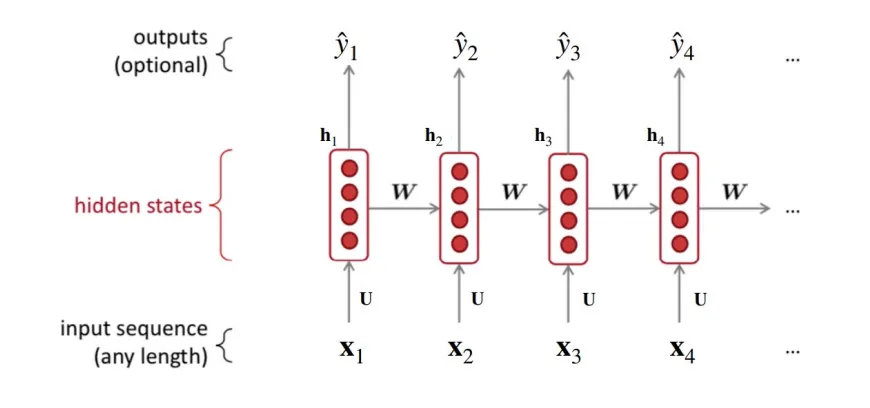

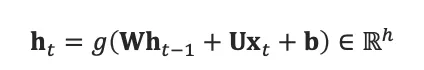

> * 동일한 가중치를 시퀀스의 여러 시점에서 반복적으로 사용한다.
> * RNN이 시퀀스 데이터의 길이나 시점 위치에 상관 없이 효과적으로 작동하게 함
> * 위의 식 처럼 같은 W(순환 가중치), U(입력 가중치), b(편향)를 공유함.

* 가중치 공유의 이점
  + 학습 파라미터 수 감소: 입력 시퀀스 길이 늘어나도 학습해야 할 파라미터 수 일정하게 유지됨.
  + 일반화 능력 향상: 시점에 따라 unique한게 아닌 일반화된 규칙 만들 수 있음.

#### 1-4) RNN의 한계 및 장기 의존성 문제
* RNN의 한계: RNN 특성상, 전체 시퀀스를 모두 읽은 후 역전파가 이루어짐          
  -> 역전파 구하는 과정에서 chain rule에 의해 다음 미분값이 반복적으로 곱해짐
  + 기울기 소실 문제: 반복적으로 곱해지는 미분값이 1보다 작을때 0으로 수렴
  + 기울기 폭주 문제: 반복적으로 곱해지는 미분값이 1보다 클 때 무한대로 발산
    - 해결법: Gradeint Clipping(gradient의 상한선을 정해서 발산 피하는 방법. 보통 gradient의 크기로 나누어준다.)
  + 느린 훈련 시간: t-1이 계산되어야 t가 계산되므로 병렬 처리 불가.

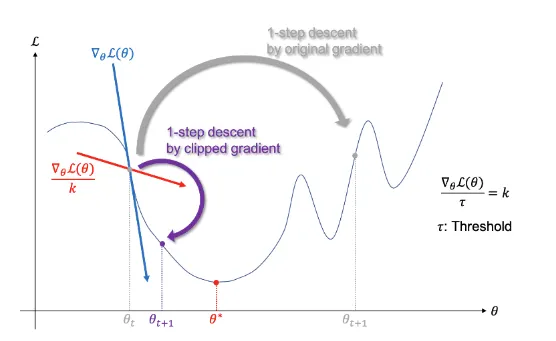

> gradient clipping

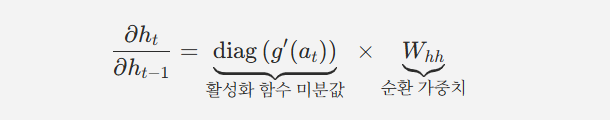

> * g(a_t): 활성화 함수
> * diag(g'(a_t)): 활성화 함수 미분값의 대각행렬 표현
> * W_hh: 첫번째 h(=h_(t-1))에서 두번째 h(=h_t)로 정보 전달될 때 사용되는 가중치

* 장기 의존성 문제(Long-Term Dependency Problem)
  + 위 세가지 한계가 이로 귀결됨.
  + 시퀀스 앞 부분의 중요 정보를 잊어버려 맥락 파악 능력이 저하되는 현상.
  + 단기 기억은 준수하나 장기기억에 문제가 발생.

### 2. LSTM & GRU: 적절히 기억하고 잊는 순환 신경망

#### 2-1) LSTM (Long Short Term Memory)
* 앞의 정보가 뒤로 충분히 전달되지 못하는 기울기 소실 문제 해결하기 위한 모델.
* gate를 통해 기억할 정보, 잊을 정보를 나눠 관리함으로써 이전 정보가 중요하면 보존된 형태로 hidden state가 업데이터 됨.
* 그러나 RNN보다 학습 파라미터가 많고 복잡해짐.

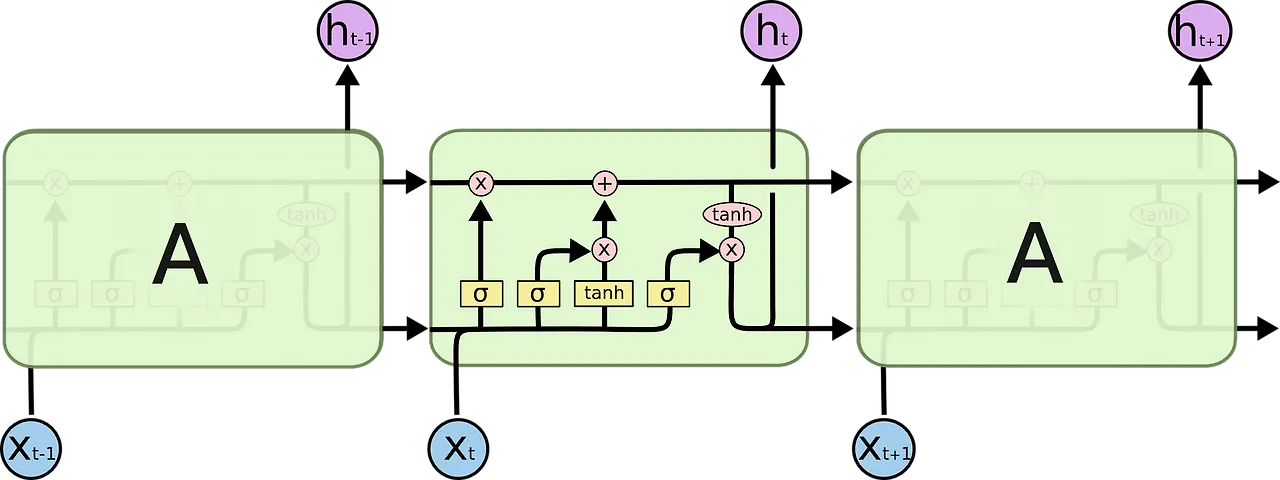

> LSTM 구조

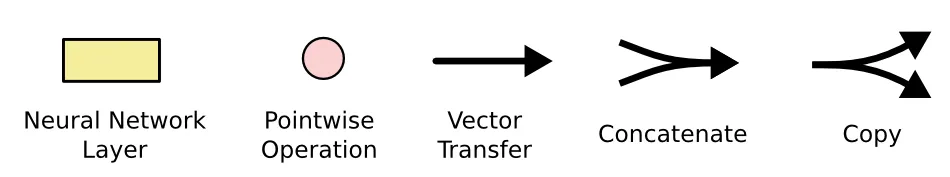

> 기호 설명

* LSTM 핵심 내용 정리
1. 아이디어: **기억할 내용**과 **잊어버릴 내용**을 선택해서, **중요 정보**를 **오래** 가져간다.
2. RNN과의 차이: C_t(cell state, 장기기억)와 h_t(hidden state, 단기기억)의 두 순환층을 사용함.


  3. Gate를 통해서 필요한 정보들만 통과한다.


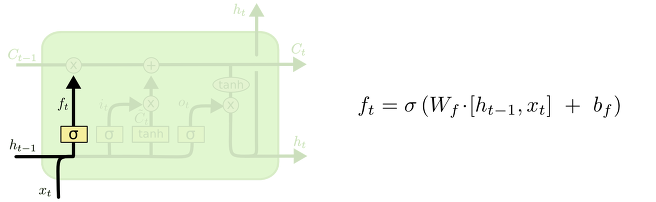

   > Forget gate: h_(t-1)과 x_t를 받아 sigmoid 통과시킨 값 f_t(0~1 사이 값임)가 C_(t-1)에 보내짐 -> 어떤 정보를 잊을지 판단 (0에 가까울수록 많이 잊음)


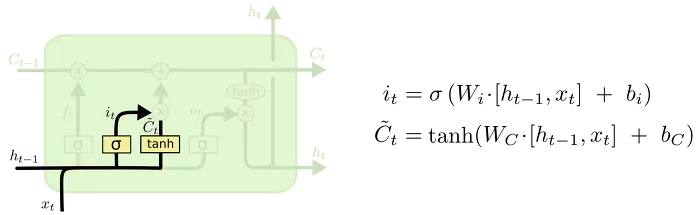

   > Input gate: sigmoid로 x_t를 얼마나 사용할지 결정(0~1) -> tanh로 새로운 후보값인 $\tilde{C}_t$ 벡터 만듦.


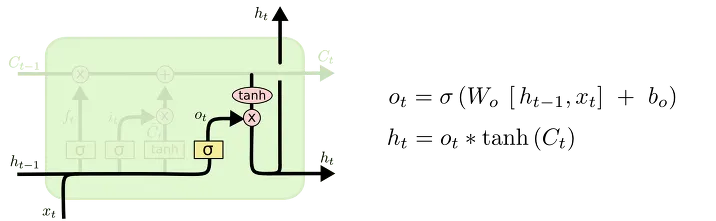

   > Output gate: 다음층으로 전달하는 hidden state를 만듦.


  4. Final memory cell: 이전값 C_(t-1)을 얼마나 잊을지(f), 입력값(i_t)을 얼마나 기억할지($\tilde{C}_t$) 구하고 이 둘을 더해서 cell state를 업데이트함.

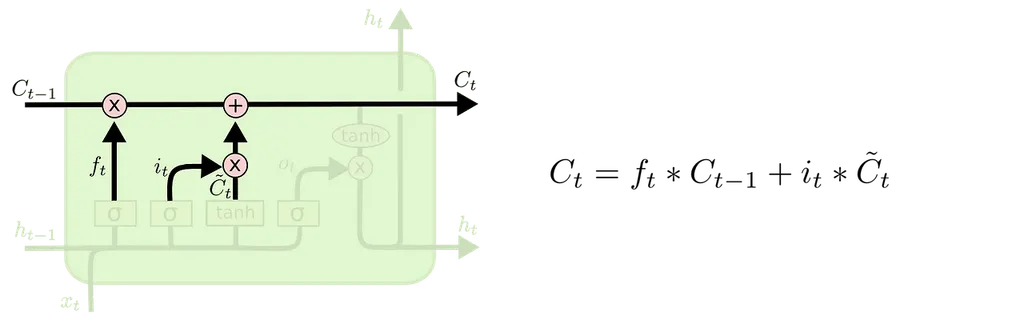

#### 2-2) GRU (Gated Recurrent Unit)

* LSTM에서 발전하여 별도의 메모리 셀 없이 게이트 수를 줄여 구조를 간소화함. 
* 성능과 효율성 밸런스가 좋음
* 긴 시퀀스 처리에서 한계 존재

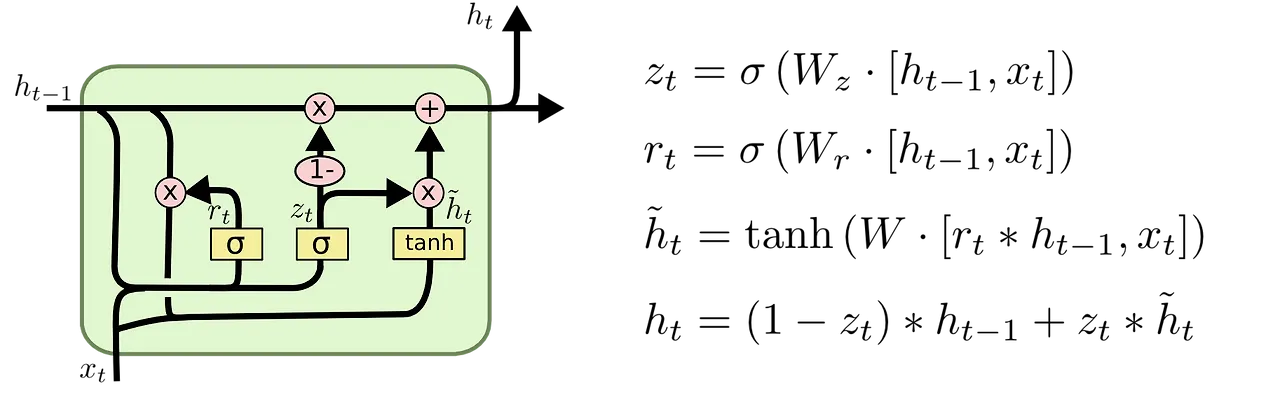

> * z_t: update gate. 이전상태와 현재 상태를 얼만큼의 비율로 반영할지
> * r_t: 이전 상태를 얼마나 반영할지
> * (1-z)와 z 사용해 한개의 게이트로 관리. (f, i 필요 없어짐)

* LSTM과의 차이점
  1. Forget gate와 input gate를 하나로 합쳐 update gate로 만듦.
  2. Reset gate를 사용
  3. gate의 개수가 3개->2개 되어 학습 시간 감소함. 성능은 유사하거나 더 좋다.

#### 2-3) 언제 어떤 모델을 선택할까?

| 구분            | **LSTM**                                                                                                                  | **GRU**                                                                                                                |
| ------------- | ------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------- |
| **구조**        | 3개 게이트 (입력, 삭제, 출력)                                                                                                       | 2개 게이트 (업데이트, 리셋)                                                                                                      |
| **복잡도**       | 더 복잡, 파라미터 수 많음                                                                                                           | 단순, 파라미터 수 적음                                                                                                          |
| **학습 속도**     | 느림 (계산량 많음)                                                                                                               | 빠름 (계산량 적음)                                                                                                            |
| **메모리 사용량**   | 큼                                                                                                                         | 작음                                                                                                                     |
| **장기 의존성 처리** | 더 강력                                                                                                                      | LSTM에 비해 다소 약함                                                                                                         |
| **연구/사례 축적**  | 매우 많음                                                                                                                     | 비교적 적음 (최근 등장)                                                                                                         |
| **성능**        | 데이터가 충분하고 문제 복잡성이 높을 때 강력                                                                                                 | 데이터가 적거나 효율성이 중요할 때 유리                                                                                                 |
| **적합한 경우**    | 긴 시퀀스에서 문맥 이해가 중요한 작업<br>데이터 양이 충분하고 복잡한 패턴을 학습해야 하는 경우<br>모델 성능이 계산 효율보다 중요한 경우<br>예: 기계 번역, 언어 모델링, 장기 시계열 예측(금융, 기후 등) | 자원이 제한적이거나 학습 속도가 중요한 경우<br>데이터 양이 적고 과적합 위험이 있는 경우<br>실시간 예측이 필요한 응용<br>예: 음성 인식, 스트리밍 데이터, 실시간 비디오 분석, 짧은 시퀀스 텍스트 분류 |


### 3. Seq2Seq; 문장 입력, 문장 출력
: 한 시퀀스를 다른 시퀀스로 변환하는 작업을 수행하는 딥러닝 모델. 기계 번역에서 사용된다.
* 특징
  1. 아이템(단어)의 입력 개수와 출력 개수 달라도 무방 (ex. 3단어 입력 -> 4단어 출력)
  2. Encoder-Decoder 모델이라고도 불림.

#### 3-1) Seq2Seq의 구조: 인코더와 디코더

* 인코더(Encoder)
  + 입력된 시퀀스를 읽고 압축한 context vector(요약 정보, 마지막시점의 h_t)를 만든다.
  + t시점의 임베딩된 단어 입력(x_t)과 h_(t-1)이 RNN/LSTM 입력으로 주어지고, 그 결과로 h_t가 나옴.  

* 디코더(Decoder)
  + 압축된 정보를 바탕으로 하는 시퀀스를 생성한다. (번역문 생성)
  + 인코더가 보내준 context vector가 디코더의 **첫번째 은닉 상태**에 사용됨. (일반적인 경우)

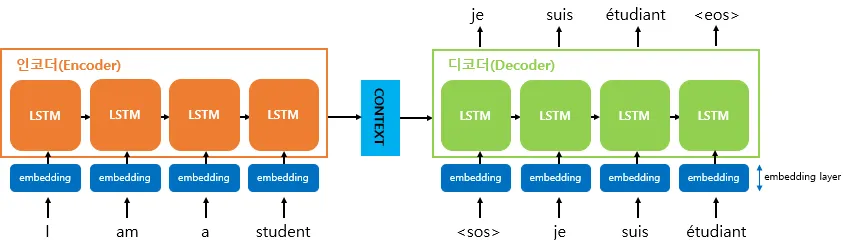

> * 인코더와 디코더 모두 RNN(or LSTM or GPU)을 여러 개 조합한 형태임
> * 모든 단어는 워드 임베딩(word2vec)과정 거침.

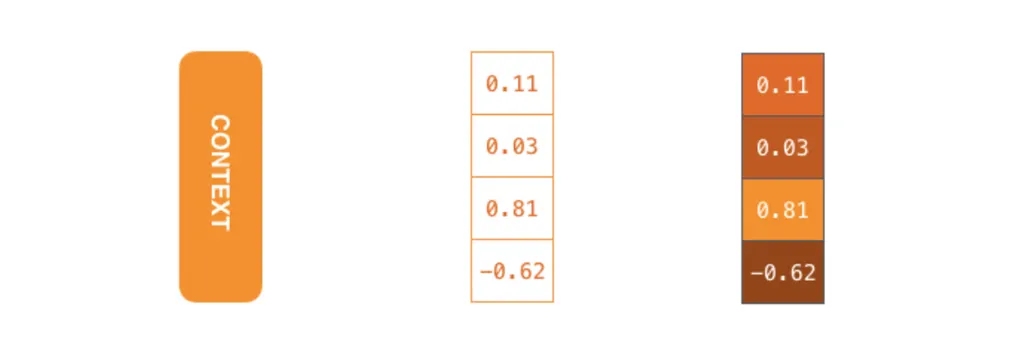

> 컨텍스트 벡터 (context vector)
> * 인코더 중 마지막 시점의 은닉 상태. float형의 벡터이다.
> * 벡터의 차원은 실제로 256,512,1024 차원으로 직접 설정 가능.

#### 3-2) Seq2Seq의 한계 ; 병목 현상 (Bottleneck)
* 고정된 context vector에 입력 문장의 정보를 압축해 담아서, 모든 정보를 담지 못하고 손실됨.
* 특히 긴 입력 시퀀스의 경우 정보 손실이 더 큼 -> 모델 성능 하락.
* 기울기 소실 문제, 병렬화 불가능 문제도 발생.
* -> Attention 메커니즘 도입하여 해결